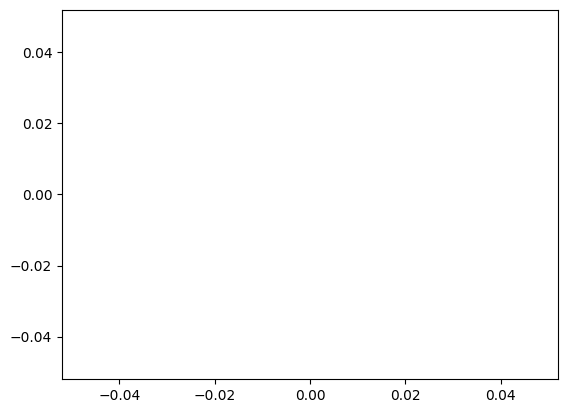

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.margins(0.020)
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
ticker_meta = yf.Ticker('META')
ticker_msft = yf.Ticker('MSFT')
ticker_aapl = yf.Ticker('AAPL')
ticker_goog = yf.Ticker('GOOGL')

In [3]:
data_meta = ticker_meta.history(period='10y')
data_msft = ticker_msft.history(period='10y')
data_aapl = ticker_aapl.history(period='10y')
data_goog = ticker_goog.history(period='10y')

In [4]:
stock_list = [data_aapl, data_goog, data_meta, data_msft]

In [5]:
# Drop NaN values

def drop(list):
    for i in list:
        i.drop(['Dividends', 'Stock Splits'], axis = 1, inplace=True)

# Adding percentage Change based on Closing Prices

def pct_change(list):
    for i in list:
        new = i['Close'].pct_change()
        i['Pct_change'] = new
        pass

drop(stock_list)
pct_change(stock_list)

data_aapl.head()

,Open,High,Low,Close,Volume,Pct_change
Date,,,,,,
2013-08-26 00:00:00-04:00,15.608219,15.902774,15.600427,15.677417,330965600,NaN
2013-08-27 00:00:00-04:00,15.522498,15.663075,15.157814,15.229192,424188800,-0.028590
2013-08-28 00:00:00-04:00,15.148462,15.453925,15.148462,15.301192,307608000,0.004728
2013-08-29 00:00:00-04:00,15.324574,15.475746,15.308365,15.326132,239657600,0.001630
2013-08-30 00:00:00-04:00,15.335479,15.365090,15.164046,15.186489,272297200,-0.009111


In [6]:
# Create a new dataframe with all the stocks and using their closing price as value

grand = pd.concat([data_goog['Close'].rename('goog'), data_aapl['Close'].rename('aapl'), data_meta['Close'].rename('meta'), data_msft['Close'].rename('msft')], axis=1, join='outer')
grand.head()

,goog,aapl,meta,msft
Date,,,,
2013-08-26 00:00:00-04:00,21.681431,15.677417,41.340000,28.597710
2013-08-27 00:00:00-04:00,21.275024,15.229192,39.639999,27.852415
2013-08-28 00:00:00-04:00,21.234985,15.301192,40.549999,27.651428
2013-08-29 00:00:00-04:00,21.407158,15.326132,41.279999,28.095259
2013-08-30 00:00:00-04:00,21.193693,15.186489,41.290001,27.969652


In [7]:
percent_com = pd.concat([data_goog['Pct_change'].rename('goog'), data_aapl['Pct_change'].rename('aapl'), data_meta['Pct_change'].rename('meta'), data_msft['Pct_change'].rename('msft')], axis=1, join='outer')
percent_com.head()

,goog,aapl,meta,msft
Date,,,,
2013-08-26 00:00:00-04:00,NaN,NaN,NaN,NaN
2013-08-27 00:00:00-04:00,-0.018744,-0.028590,-0.041122,-0.026061
2013-08-28 00:00:00-04:00,-0.001882,0.004728,0.022957,-0.007216
2013-08-29 00:00:00-04:00,0.008108,0.001630,0.018002,0.016051
2013-08-30 00:00:00-04:00,-0.009972,-0.009111,0.000242,-0.004471


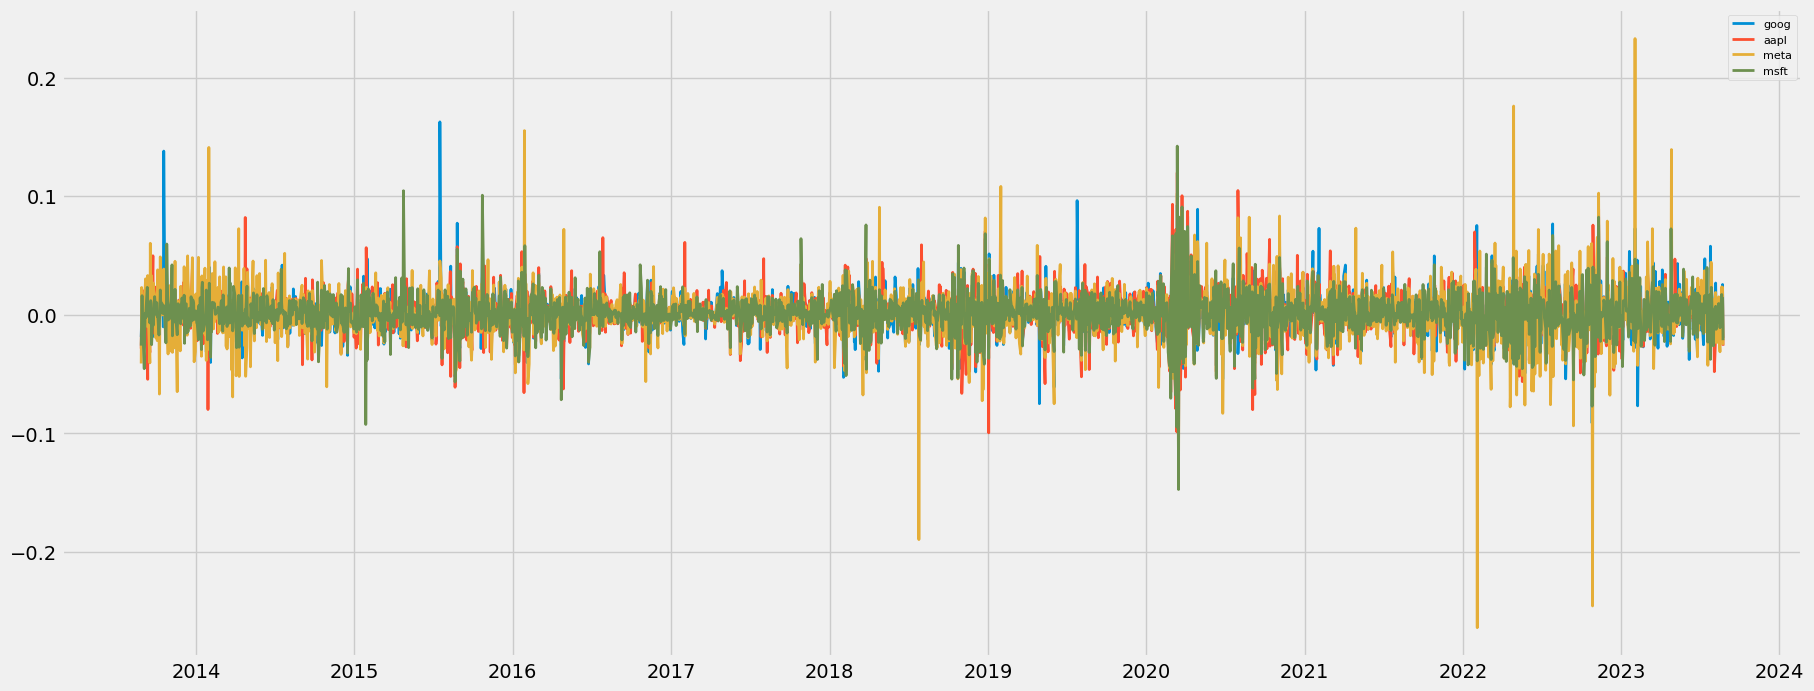

In [8]:
fig, ax = plt.subplots(figsize=(20,8))

for i in percent_com.columns.values:
    ax.plot(percent_com[i], lw=2, label = i)

ax.legend(loc = 'upper right', fontsize = 8)
plt.show(fig)

In [9]:
corr_matrix = grand.corr(method='pearson')
corr_matrix

,goog,aapl,meta,msft
goog,1.000000,0.957357,0.846910,0.975962
aapl,0.957357,1.000000,0.752265,0.984889
meta,0.846910,0.752265,1.000000,0.816863
msft,0.975962,0.984889,0.816863,1.000000


<Axes: >

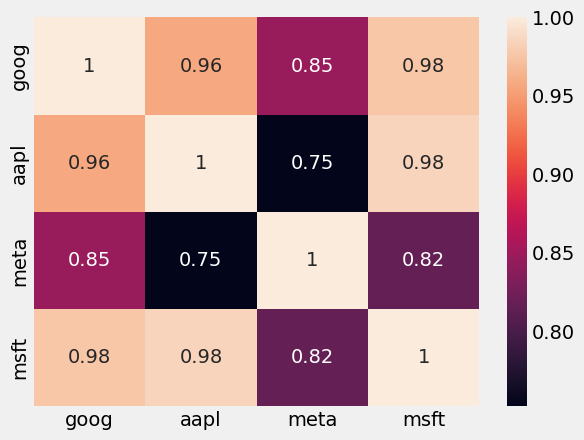

In [10]:
import seaborn as sb

sb.heatmap(corr_matrix, annot=True)

In [11]:
avg_ret = percent_com.mean()
print(avg_ret * 100)

goog    0.086502
aapl    0.112396
meta    0.105727
msft    0.110626
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

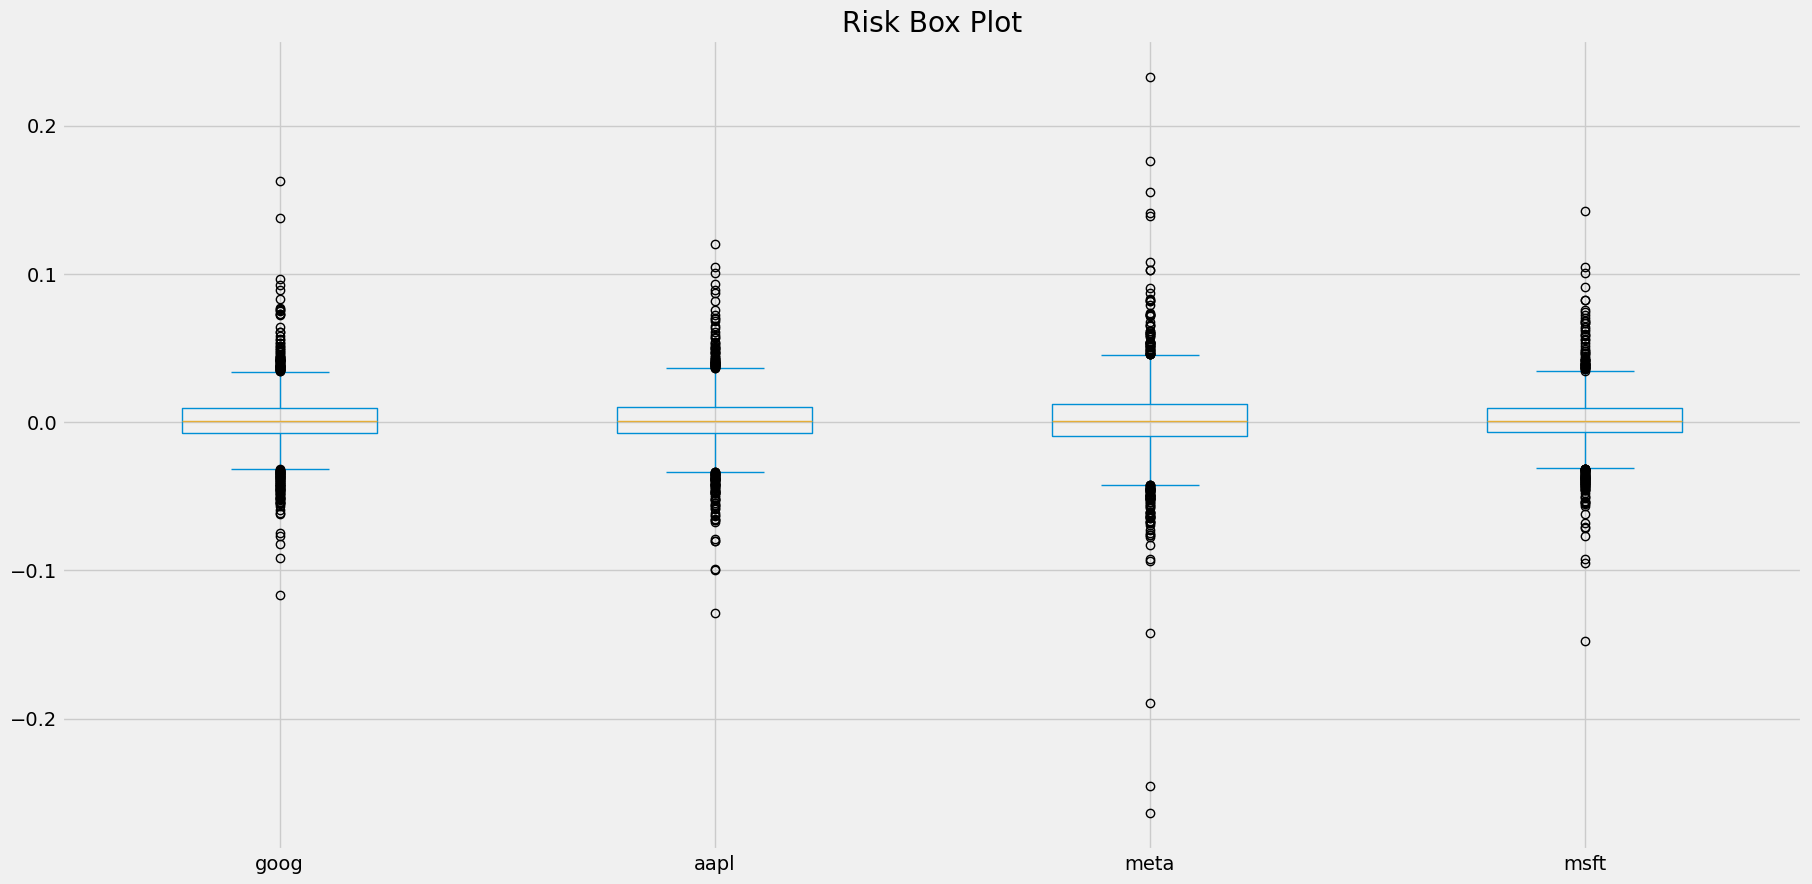

In [12]:
percent_com.plot(kind='box', figsize=(20, 10), title='Risk Box Plot')

In [13]:
# Calculate standard deviation

std_dev = grand.std()
std_dev

goog    35.332196
aapl    54.004002
meta    79.942556
msft    97.190421
dtype: float64

In [14]:
grand_cov = grand.cov()
grand_cov

,goog,aapl,meta,msft
goog,1248.364060,1826.713305,2392.134933,3351.407227
aapl,1826.713305,2916.432271,3247.692456,5169.361594
meta,2392.134933,3247.692456,6390.812193,6346.736442
msft,3351.407227,5169.361594,6346.736442,9445.977849


<Axes: >

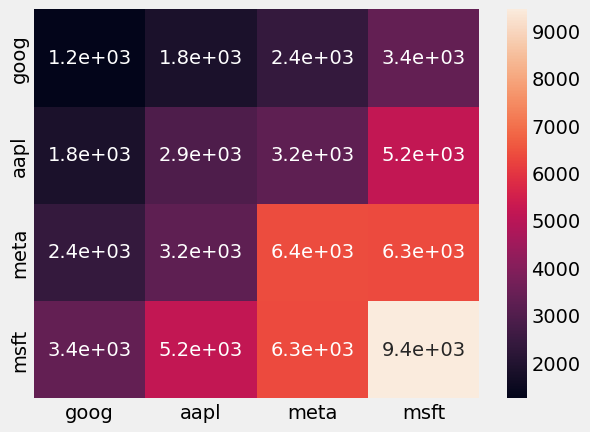

In [15]:
sb.heatmap(grand_cov.head(), annot=True)

In [98]:
grandd = grand.round(0)

In [112]:
pd.set_option('display.max_rows', 1000)

In [123]:
# Create a portfolio with 100 rupees and let's see how it works out

portfolio_value = 1000
cash = 0
max_holdings = 4
max_weight = 0.25
riskk_free_rate = 0.6
stocks_list = ['aapl', 'goog', 'meta', 'msft']
counter = 0
range_counter = 0
num_shares = 0
holdings = {'aapl' : 0, 'msft' : 0, 'meta' : 0, 'goog' : 0}
shares = []

# Entry and Exit Points

# Entry
signal = False

while (range_counter < len(grandd)):
    grandd.reset_index(drop=True, inplace=True)
    for i in stocks_list:
        # print(grand[i][counter])
        if (grandd[i][range_counter] > grandd[i].mean() and signal == False):
            # Trigger Buy
            # counter += 1
            num_shares = round((portfolio_value) / grand[i][range_counter])
            print(num_shares)
            holdings[grandd[i].name] = num_shares
            shares.append([grandd[i].name, grandd[i][range_counter], num_shares, 'bought'])
            investment = num_shares * grandd[i][range_counter]
            cash = portfolio_value - investment
            # print(holdings)
            signal = True

        elif (grandd[i][range_counter] < grandd[i].mean() and signal == True):
            #Trigger Sell
            shares_owned = holdings[grandd[i].name]
            Amt_invested = shares_owned * grandd[i][range_counter]
            portfolio_value = cash + Amt_invested
            counter += 1
            shares.append([grandd[i].name ,grandd[i][range_counter], 0, 'Sold'])
            signal = False
        
    range_counter += 1

    if (range_counter >= 2517):
        break
        
tally = pd.DataFrame(shares, columns=['Name','B', 'C', 'D'])
# tally.head(1000)
print(holdings)
# print(portfolio_value)

6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [103]:
grand['aapl'].name

'aapl'

In [93]:
print(holdings)

{'aapl': 0, 'msft': 0.0, 'meta': 0.0, 'goog': 0.0}
